# Assignment A2 - Visualization

Course "Data processing and Visualization", IE500417, NTNU. Autumn 2025


https://www.ntnu.edu/studies/courses/IE500417

## Task description

The goal of this assignment is to get familiar with visualization options.

You can choose whichever visualization tools work best for you. Suggested toolset: either [Plotly](https://plot.ly/python/) or [Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html). Check the notebooks on Blackboard Week 02 with examples.

## Detailed steps

First the imports

In [1]:
import pandas as pd

Now do the imports necessary for your visualization tools (MatPlotLib, Plotly, or whatever you use)

**TASK FOR YOU**:

In [2]:
# Your code here - do the imports
import matplotlib.pyplot as plt

We will use data set on olympic game results. The data set comes from [Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2). Hint: you can look at different data processing solutions by other people there. Just remember that this work is your individual contribution!

In [3]:
olympics = pd.read_csv("athlete_events.csv")
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Task 1: Inspect the columns

Always when you work with data, it is important to find out first what kind of data are you working with. How many rows are there, how many columns? What are column types, are there any empty values?

One thing that you can always do: get quick statistics using the `.describe()` method. That gives the first impression of the values.

In [4]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Another typical issue: missing values. In the snapshot above we see that some cells have value NaN. It means "not a number", i.e, the value is missing.

Pandas DataFrame has method `.isnull()`. Use it to find out which columns have empty values. 

**TASK FOR YOU**:

In [5]:
# Your code here
print(olympics.isnull())
olympics.isnull().sum()

           ID   Name    Sex    Age  Height  Weight   Team    NOC  Games  \
0       False  False  False  False   False   False  False  False  False   
1       False  False  False  False   False   False  False  False  False   
2       False  False  False  False    True    True  False  False  False   
3       False  False  False  False    True    True  False  False  False   
4       False  False  False  False   False   False  False  False  False   
...       ...    ...    ...    ...     ...     ...    ...    ...    ...   
271111  False  False  False  False   False   False  False  False  False   
271112  False  False  False  False   False   False  False  False  False   
271113  False  False  False  False   False   False  False  False  False   
271114  False  False  False  False   False   False  False  False  False   
271115  False  False  False  False   False   False  False  False  False   

         Year  Season   City  Sport  Event  Medal  
0       False   False  False  False  False   Tr

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

***Your answer here (in case you need an explanatory comment in addition to code)***

...

### Task 2: Clarify attribute types

Before you visualize data, you should check what types do the attributes have. Your task: inspect all the columns and for each of them clarify: is this attibute quantitative, ordinal or categorical?

Store the names of all categorical attributes in a list and call it `categories`. In a similar fashion, store ordinal attribute names in a variable named `ordinals` and quantitative attribute names in `quants`.

For example, if you think that attributes age and height are categorical while year and team are quantitative, your variables should be:

```
categories = ["Age", "Height"]
quants = ["Year", "Team"]
ordinals = []
```

**TASK FOR YOU**:

In [6]:
# Your code here
categories = ["ID", "Name", "Sex", "Team", "NOC", "Games", "Season", "City", "Sport", "Event"]
quants = ["Age", "Height", "Weight", "Year"]
ordinals = ["Medal"]

### Task 3: Display Nordic gold

In this step you will visualize gold medals for Nordic countries. First, we select data for each country (this is just one option, there are many ways to do it).

In [7]:
# Comment: This returns a filter: a list with boolean (true/false) values for each row: true if the country code is "NOR":
# olympics["NOC"] == "NOR"
# This selects only those rows from the dataframe, where the filter says "True" in the corresponding row:
# olympics[olympics["NOC"] == "NOR"]
# etc...

nor = olympics[olympics["NOC"] == "NOR"]
swe = olympics[olympics["NOC"] == "SWE"]
den = olympics[olympics["NOC"] == "DEN"]
fin = olympics[olympics["NOC"] == "FIN"]
isl = olympics[olympics["NOC"] == "ISL"]

nor


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
59,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Downhill,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
62,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270398,135259,Schirin Zorriasateiny,F,20.0,167.0,55.0,Norway,NOR,1984 Summer,1984,Summer,Los Angeles,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Individual,NaN
270674,135365,Mats Andr Zuccarello-Aasen,M,22.0,171.0,74.0,Norway,NOR,2010 Winter,2010,Winter,Vancouver,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
270675,135365,Mats Andr Zuccarello-Aasen,M,26.0,171.0,74.0,Norway,NOR,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
271017,135524,"Nicolaus ""Nic"" Zwetnow",M,31.0,181.0,70.0,Norway,NOR,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN


**Task 3.1: Visualize total number of gold medals per Nordic country, in a single plot.**

Use a single figure that shows these two attributes: a country and number of medals (for a particular country). When you choose the type of chart, keep in mind the attribute types that you are visualizing!

**TASK FOR YOU**:

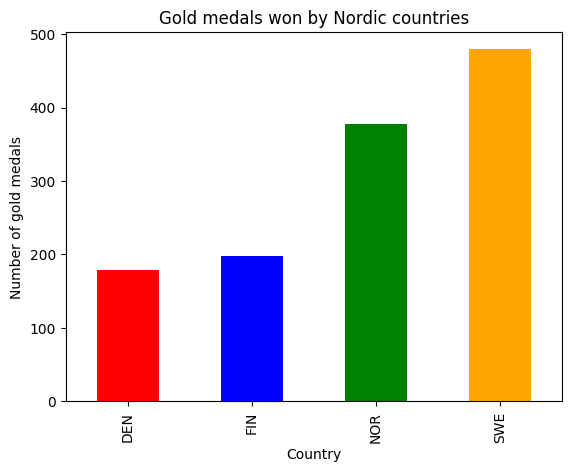

In [8]:
# Your code here

nordics = ["NOR", "SWE", "DEN", "FIN", "ISL"]

gold = olympics[(olympics["Medal"] == "Gold") & (olympics["NOC"].isin(nordics))]

gold_counts = gold.groupby(["NOC"]).size()

colors = ["red", "blue", "green", "orange", "purple"]

gold_counts.plot(kind="bar", color=colors)
plt.title("Gold medals won by Nordic countries")
plt.xlabel("Country")
plt.ylabel("Number of gold medals")
plt.show()

The next task is to show one more attribute: Season. You should show the total number of medals per Nordic country, but separated by season. I.e, how many medals has Norway got in Summer Olympics, how many in Winter olympics; how many gold medals has Sweden got in Winter Olympics, how many in Summer, etc. Think about the "Season" attribute - what type does it have and what channel would be appropriate to visualize it?

**Task 3.2: Visualize total number of gold medals per Nordic country, per season.**

**TASK FOR YOU**:

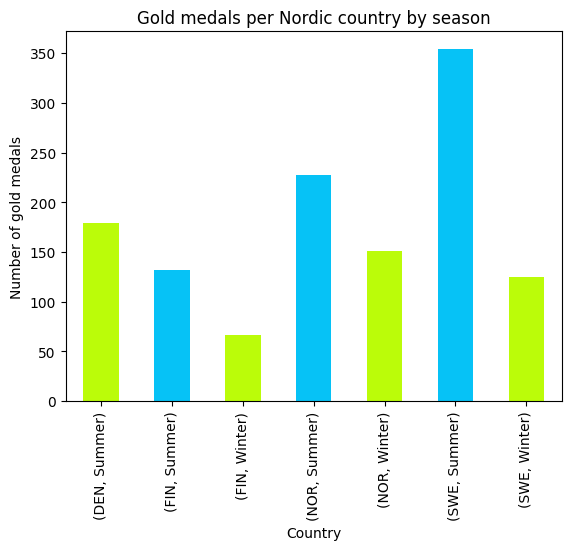

In [9]:
# Your code here

nordics = ["NOR", "SWE", "DEN", "FIN", "ISL"]

gold = olympics[(olympics["Medal"] == "Gold") & (olympics["NOC"].isin(nordics))]

gold_count = gold.groupby(["NOC", "Season"]).size()

colors = ["#BBFC09", "#06C2F6"] # Summer, Winter colors

gold_count.plot(kind="bar", color=colors)
plt.title("Gold medals per Nordic country by season")
plt.xlabel("Country")
plt.ylabel("Number of gold medals")
plt.show()

**Task 3.3: Reflect/explain: why did you choose these chart types? What marks and channels are they using to convey the information of each attribute?**

**TASK FOR YOU**:

I tought bar charts were appropriate since i had both cathegorical and a quantitive variables to plot. Then i can use the categories in the X axis and qantitive variables in the Y axis. This is intuitive and easy to read in my opinion.

## Task 4: Visualize trend

Visualize number of women participating in the Olympics (with or without medals) over the years in a single chart. 

**TASK FOR YOU**:

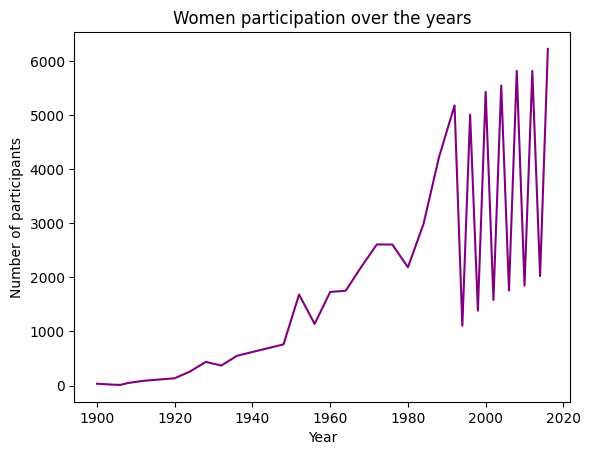

In [10]:
# Your code here

women = olympics[olympics["Sex"] == "F"]
years = women.groupby("Year").size()

years.plot(kind="line", color="purple")
plt.title("Women participation over the years")
plt.xlabel("Year")
plt.ylabel("Number of participants")
plt.show()

**TASK FOR YOU: The chart probably will have som weird spikes towards the end. Do some analysis to understand what it means and why does it appear.**

I think the spikes are correct and come from that the winter and summer olympics used to be in the same year. But this is now changed so the winter olympics are every other olympics. The winter olympicsa are smaller than summer thus the spikes. 

**TASK FOR YOU: Find a reasonable way to aggregate the data to get the overall trend over the years. I.e., get rid of the spikes.**

<Axes: xlabel='Year'>

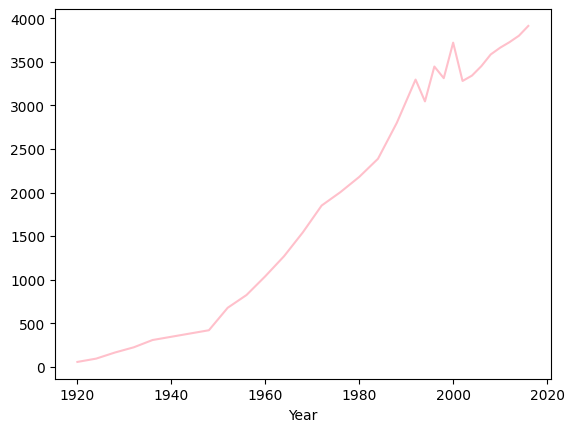

In [11]:
# Your code here

# Unsure if this is correct but it looks better found at:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

rolling = years.rolling(window=6).mean()
rolling.plot(kind="line", color="pink")

**Your reflection here - Explain why your approach makes sense.**

I am not sure to be honest i used a rolling mean but does this not actually make the graph less accurate. It does give an idea of the number of contestants increases over the years in total between the winter and summer olympics.

## Task 5: Visualize statistics

Sometimes you want to look at distribution of values for an attribute. There are several choices. [Histogram](https://en.wikipedia.org/wiki/Histogram) is one of them. Idea of histogram: we split the value range into intervals of specific size and count how many attributes have value that fits within each interval. 

**Task 5.1: Show histogram of weight for all gold medal winners in the WINTER season.**

**TASK FOR YOU**:

<Axes: ylabel='Frequency'>

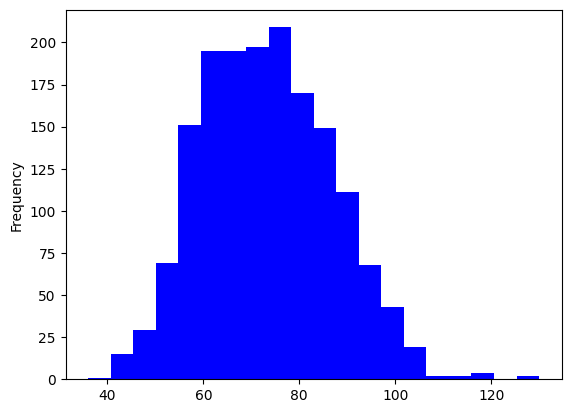

In [12]:
# Your code here
winter_gold = olympics[(olympics["Season"] == "Winter") & (olympics["Medal"] == "Gold")]
winter_weight = winter_gold["Weight"]
winter_weight.plot(kind="hist", bins=20, color="blue")

**Task 5.2: Show histogram of weight for all gold medal winners in the SUMMER season.** Note: the histogram should be comparable with the WINTER histogram.

**TASK FOR YOU**:

<Axes: ylabel='Frequency'>

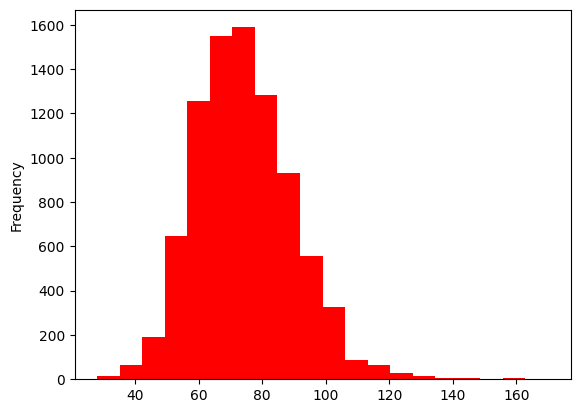

In [13]:
# Your code here
summer_gold = olympics[(olympics["Season"] == "Summer") & (olympics["Medal"] == "Gold")]
summer_weight = summer_gold["Weight"]
summer_weight.plot(kind="hist", bins=20, color="red")

## Task 6: Visualize trend of statistics (a bit more challenging)

In this task you will visualize how one attribute varies over time. But instead of visualizing a single value, we will look at the statistics.

First, we calculate Body Mass Index for all participants. Formula: BMI = Weight / (Height * Height)

In [14]:
olympics["BMI"] = olympics["Weight"] / (olympics["Height"] ** 2)

Your task is to group the entries by year, for each year show the statistics of BMI: the mean BMI value and the range of values. There are different options available, including:
- Show a box plot for each year
- Show [Bollinger Bands (R)"](https://en.wikipedia.org/wiki/Bollinger_Bands) for the BMI variable. Bollinger Bands is typically used in finance. But it uses statistical concepts in the core: a moving average line shown in the middle, upper and lower bands shown as the mean +/- two standard deviations.
- Be creative! :)

Note: the idea is to show this in a single plot. Don't create a separate box plot for every year.

Some inspirational examples from a [Kaggle solution by Marco Giuseppe de Pinto](https://www.kaggle.com/marcogdepinto/let-s-discover-more-about-the-olympic-games)): 
<img src="files/stats-plot-example.jpg">

<img src="files/boxplots-example.jpg">

**TASK FOR YOU**:

Text(0.5, 1.0, 'Average BMI of athletes over the years')

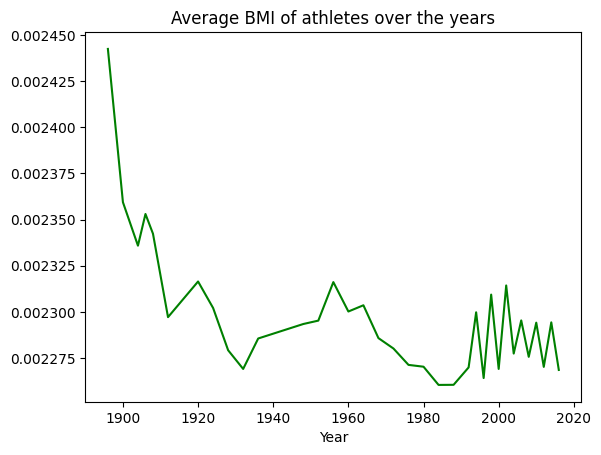

In [19]:
# Your code here

years = olympics.groupby("Year")
years["BMI"].mean().plot(kind="line", color="green")
plt.title("Average BMI of athletes over the years")

## Reflection

Please reflect on the following questions:
1. How did the assignment go? Was it easy or hard?

    -It was fine i was able to complete all the tasks with a little research on the harder tasks.
2. How many hours did you spend on it?

    -Around 2 hours.
3. What was the most time-consuming part?

    -Part 4 were i had to find the reason for the spikes.
4. If you need to do similar things later in your professional life, how can you improve? How can you do it more efficiently?

    -I do not know maby by knowing the toolset better i can find solution faster and without needing to research.
5. Was tehre something you would expect to learn that this exercise did not include?

    -No.
6. Was there something that does not make sense?

    -No.